In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

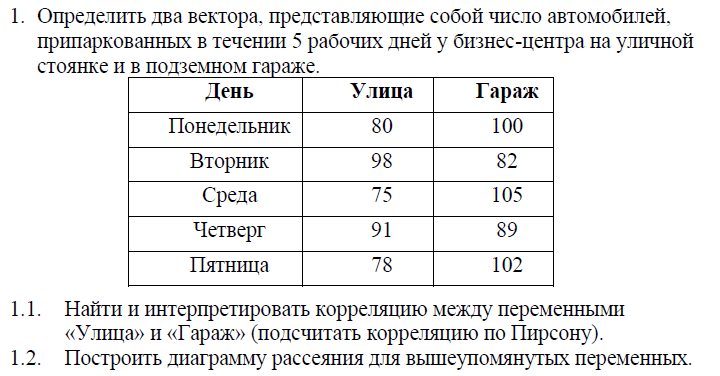

Корреляция между переменными Улица и Гараж = -1.0


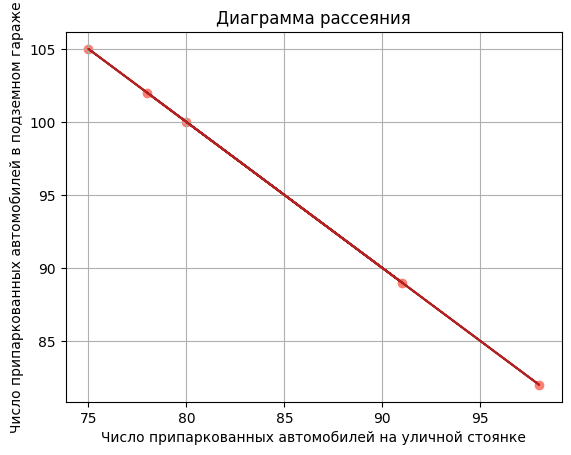

In [2]:
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

print(f'Корреляция между переменными Улица и Гараж = {round(np.corrcoef(street, garage)[0,1], 4)}')

plt.grid(True)
plt.title('Диаграмма рассеяния')
plt.xlabel('Число припаркованных автомобилей на уличной стоянке')
plt.ylabel('Число припаркованных автомобилей в подземном гараже')
plt.scatter(street, garage, marker='o', color='salmon')

z = np.polyfit(street, garage, 1)
p = np.poly1d(z)
plt.plot(street, p(street), label = f'линия тренда', color='firebrick')

Вывод: Наблюдается сильная корреляция/зависимость между переменными, причем она обратно-пропорциональна: чем больше припаркованных машин на стоянке, тем меньше припаркованных машин в гараже, и наоборот

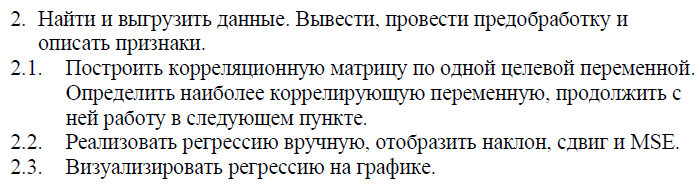

Исходный датасет содержит информацию по штатам о различных преступлениях, совершенных против женщин в период с 2001 по 2021 год. Сюда включены некоторые преступления, такие как изнасилование, похищение людей, смерть из-за приданого и т.д.

**Описание датасета**
- ***State*** - название штата
- ***Year*** - год, когда было зарегистрировано преступление
- ***Rape*** (Rape cases) - количество случаев изнасилования
- ***K&A*** (Kidnap and Assault) - количество похищений людей
- ***DD*** (Dowry deaths) - случаи смерти из-за приданого
- ***AoW*** (Assault against women) - нападения на женщин
- ***AoM*** (Assault against modesty of women) - посягательство на женскую скромность
- ***DV*** (Domestic violence) - домашнее насилие
- ***WT*** (Women Trafficiking) - торговля женщинами

In [3]:
data_1 = pd.read_csv('CrimesOnWomenData.csv')

print(data_1.head(), '\n')
print(data_1.info(), '\n')
print(data_1.isnull().sum(), '\n')
print(data_1.describe())

   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-

In [4]:
data_1 = data_1.loc[:, 'Year' : 'WT']
corr_matrix = data_1.corr().Rape.to_frame().round(3)
corr_matrix

,Rape
Year,0.174
Rape,1.000
K&A,0.701
DD,0.553
AoW,0.804
AoM,0.458
DV,0.680
WT,0.219


In [5]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,Rape
Year,0.174000
Rape,1.000000
K&A,0.701000
DD,0.553000
AoW,0.804000
AoM,0.458000
DV,0.680000
WT,0.219000


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
x = np.array(data_1[['AoW']], type(float))
y = np.array(data_1['Rape'], type(float))

model.fit(x,y)

LinearRegression()

Угол наклона = 0.3189, коэффициент сдвига = 224.2125
MSE = 336548.918


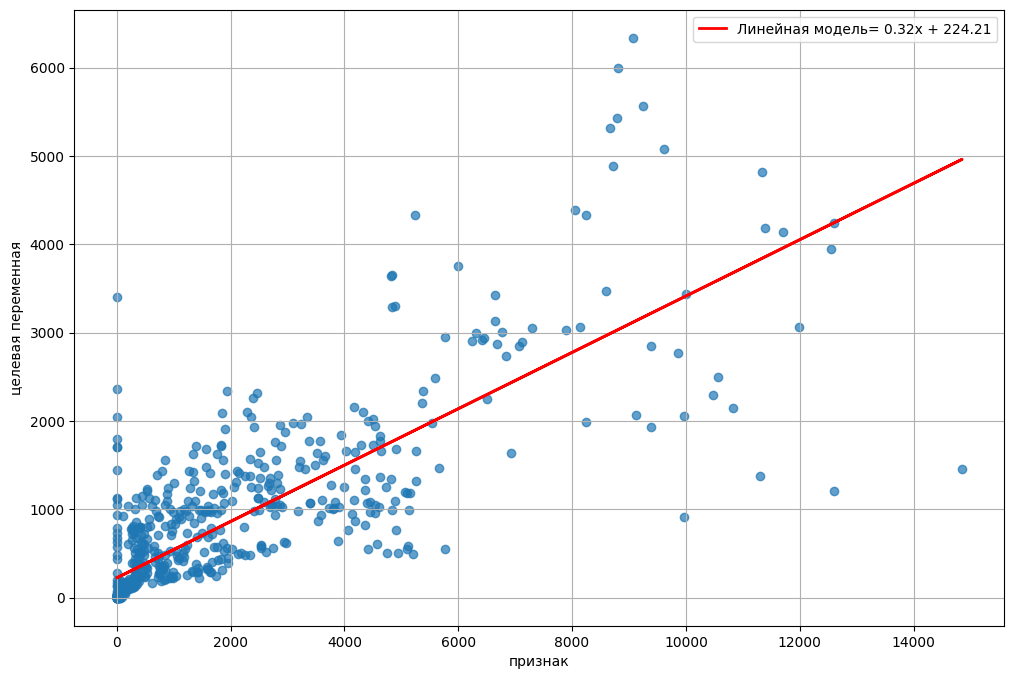

In [7]:
model_a = model.coef_[0]
model_b = model.intercept_
model_y_sk = model_a * x + model_b

print(f'Угол наклона = {model.coef_[0]:.4f}, коэффициент сдвига = {model.intercept_:.4f}')
print(f'MSE = {mean_squared_error(model_y_sk, y):.3f}')

plt.figure(figsize=(12, 8))
plt.plot(x, model_y_sk, linewidth=2, color='r', label=f'Линейная модель= {model_a:.2f}x + {model_b:.2f}')
plt.scatter(x, y, alpha=0.7)
plt.grid()
plt.xlabel('признак')
plt.ylabel('целевая переменная')
plt.legend()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
x = np.array(data_1[['AoW']], type(float))
y = np.array(data_1['Rape'], type(float))

x_mean = np.mean(x)
x_std = np.std(x)
y_mean = np.mean(y)
y_std = np.std(y)

x_normalized = (x - x_mean) / x_std
y_normalized = (y - y_mean) / y_std

model = LinearRegression()
model.fit(x_normalized, y_normalized)

# Предсказания на нормализованных данных
model_y_sk_normalized = model.predict(x_normalized)

# Денормализация предсказаний
model_y_sk = model_y_sk_normalized * y_std + y_mean

# Денормализация параметров модели
model_a = model.coef_[0] * (y_std / x_std)
model_b = y_mean + model.intercept_ * y_std - model_a * x_mean

print(f'Угол наклона = {model_a:.4f}, коэффициент сдвига = {model_b:.4f}')
print(f'MSE = {mean_squared_error(y, model_y_sk):.3f}')

Угол наклона = 0.3189, коэффициент сдвига = 224.2125
MSE = 336548.918


In [9]:
def normalize_data(x, y):
    x_mean = np.mean(x)
    x_std = np.std(x)
    y_mean = np.mean(y)
    y_std = np.std(y)

    x_norm = (x - x_mean) / x_std
    y_norm = (y - y_mean) / y_std

    return x_norm, y_norm, (x_mean, x_std, y_mean, y_std)

# Нормализация
x_norm, y_norm, norm_params = normalize_data(x, y)

def mse_error(x, w1, w0, y):
  y_pred = w1 * x[:, 0] + w0
  return np.mean((y - y_pred) ** 2)

def gr_mse_error(x, w1, w0, y):
  y_pred = w1 * x[:, 0] + w0
  return np.array([-2/len(x) * np.sum((y - y_pred)), #сдвиг
                   -2/len(x) * np.sum((y - y_pred) * (x[:, 0]))]) #наклон

x = np.array(data_1[['AoW']], type(float))
y = np.array(data_1['Rape'], type(float))

eps = 0.0001 #критерий останова
w1 = 0.3
w0 = 200

learning_rate = 0.0000001

next_w1 = w1
next_w0 = w0

n = 10000000
for i in range(n):
  cur_w1 = next_w1
  cur_w0 = next_w0
  try:
    gradient = gr_mse_error(x, cur_w1, cur_w0, y)
    #антиградиент
    next_w0 = cur_w0 - learning_rate * gradient[0]
    next_w1 = cur_w1 - learning_rate * gradient[1]

    print(f'Итерация: {i}')
    print(f'Текущая точка {cur_w1, cur_w0} | следующая точка {next_w1, next_w0}')
    print(f'MSE {mse_error(x, cur_w1, cur_w0, y)}\n')
    if (np.isnan(next_w1) or np.isnan(next_w0) or \
        np.isinf(next_w1) or np.isinf(next_w0) or \
        mse_error(x, cur_w1, cur_w0, y) > 1e100):
      print('Обнаружено переполнение. Уменьшение learning_rate.')
      learning_rate /= 10
      next_w1 = cur_w1
      next_w0 = cur_w0
      continue
    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
      break

  except Exception as e:
        print(f'Ошибка на итерации {i}: {e}')
        learning_rate /= 10
        next_w1 = cur_w1
        next_w0 = cur_w0
        continue

print(f'w1 = {next_w1:.10f}, w0 = {next_w0:.10f}')

Итерация: 0
Текущая точка (0.3, 200) | следующая точка (np.float64(0.3400591900815218), np.float64(200.0000108242663))
MSE 341652.98498641304

Итерация: 1
Текущая точка (np.float64(0.3400591900815218), np.float64(200.0000108242663)) | следующая точка (np.float64(0.3115653393188951), np.float64(200.00000899691292))
MSE 339336.4938688235

Итерация: 2
Текущая точка (np.float64(0.3115653393188951), np.float64(200.00000899691292)) | следующая точка (np.float64(0.33183283487589027), np.float64(200.00001616857614))
MSE 338164.49122990505

Итерация: 3
Текущая точка (np.float64(0.33183283487589027), np.float64(200.00001616857614)) | следующая точка (np.float64(0.3174166918134465), np.float64(200.00001693929468))
MSE 337571.5296416761

Итерация: 4
Текущая точка (np.float64(0.3174166918134465), np.float64(200.00001693929468)) | следующая точка (np.float64(0.3276708025212473), np.float64(200.00002226296402))
MSE 337271.5273489153

Итерация: 5
Текущая точка (np.float64(0.3276708025212473), np.float

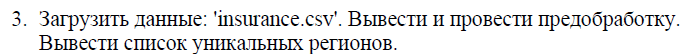

In [11]:
data_2 = pd.read_csv('insurance.csv')
print(data_2.head(), '\n')
print(data_2.info(), '\n')
print(data_2.isnull().sum(), '\n')
print(data_2.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
cha

In [12]:
uniq_regions = data_2['region'].unique()
uniq_regions

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

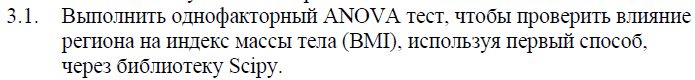

In [15]:
from scipy import stats as sts
from scipy.stats import f_oneway, ttest_ind

region_data = [data_2[data_2['region'] == region]['bmi'] for region in uniq_regions]

f_stat, p_value = f_oneway(*region_data)
print(f'F-статистика = {f_stat:.4f}')
print(f'p-value = {p_value:.4f}')

F-статистика = 39.4951
p-value = 0.0000


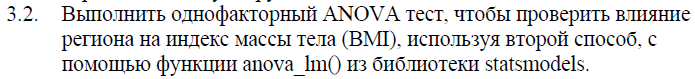

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('bmi ~ C(region)', data=data_2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(region),4055.880631,3.0,39.495057,1.881839e-24
Residual,45664.319755,1334.0,NaN,NaN


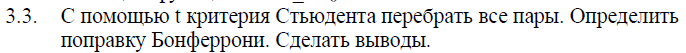

In [19]:
from itertools import combinations
region_pairs = list(combinations(uniq_regions, 2))
bonferroni_alpha = 0.05 / len(region_pairs)

results = []
for region1, region2 in region_pairs:
  bmi1 = data_2[data_2['region'] == region1]['bmi']
  bmi2 = data_2[data_2['region'] == region2]['bmi']

  t_stat, p_val = ttest_ind(bmi1, bmi2, equal_var=False)
  significant = 'отклоняется' if p_val < bonferroni_alpha else 'принимается'

  results.append({
      'Регион 1': region1,
      'Регион 2': region2,
      't-статистика': f'{t_stat:.4f}',
      'p_value': f'{p_val:.4f}',
      'Нулевая гипотеза': significant
  })

data_results = pd.DataFrame(results)
print(data_results)


    Регион 1   Регион 2 t-статистика p_value Нулевая гипотеза
0  southwest  southeast      -5.9516  0.0000      отклоняется
1  southwest  northwest       3.2844  0.0011      отклоняется
2  southwest  northeast       3.1167  0.0019      отклоняется
3  southeast  northwest       9.3768  0.0000      отклоняется
4  southeast  northeast       8.8355  0.0000      отклоняется
5  northwest  northeast       0.0603  0.9519      принимается


image.png

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


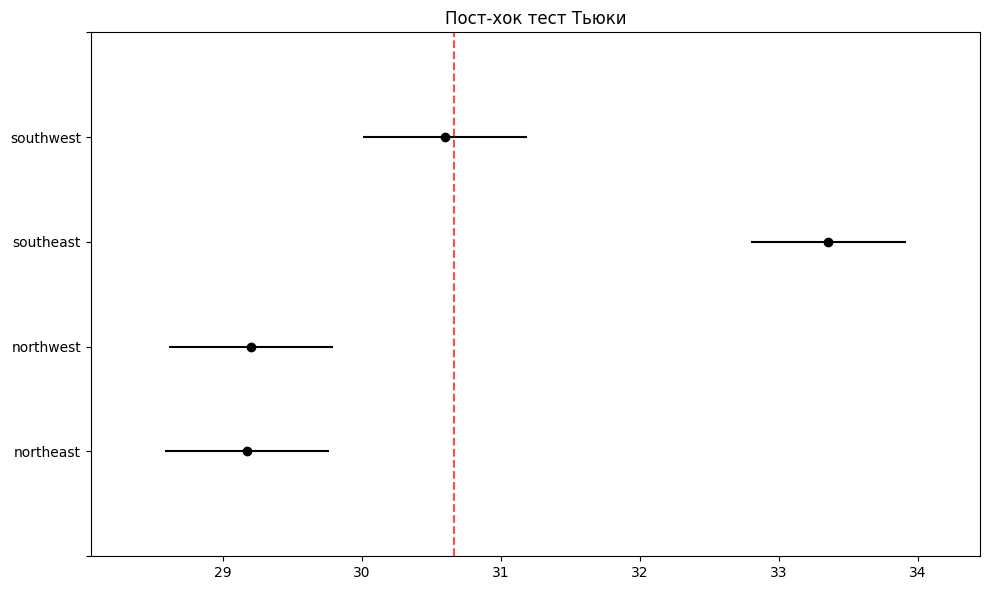

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data_2['bmi'], groups=data_2['region'], alpha=0.05)
print(tukey)

fig, ax = plt.subplots(figsize=(10, 8))
tukey.plot_simultaneous(ax=ax)
plt.axvline(x=data_2['bmi'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Среднее BMI: {data_2["bmi"].mean():.2f}')
plt.title('Пост-хок тест Тьюки')
plt.tight_layout()
tukey.summary()

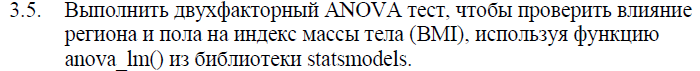

In [24]:
model_pair = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=data_2).fit()
anova_pair = sm.stats.anova_lm(model_pair, typ=2)
anova_pair

,sum_sq,df,F,PR(>F)
C(region),4034.975135,3.0,39.398134,2.163195e-24
C(sex),86.007035,1.0,2.519359,1.126940e-01
C(region):C(sex),174.157808,3.0,1.700504,1.650655e-01
Residual,45404.154911,1330.0,NaN,NaN


image.png

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
northeast_female   northeast_male  -0.2998 0.9998 -2.2706  1.6711  False
northeast_female northwest_female  -0.0464    1.0 -2.0142  1.9215  False
northeast_female   northwest_male  -0.2042    1.0 -2.1811  1.7728  False
northeast_female southeast_female   3.3469    0.0    1.41  5.2839   True
northeast_female   southeast_male   4.6657    0.0  2.7634   6.568   True
northeast_female southwest_female   0.7362 0.9497 -1.2377    2.71  False
northeast_female   southwest_male   1.8051 0.1007 -0.1657   3.776  False
  northeast_male northwest_female   0.2534 0.9999 -1.7083  2.2152  False
  northeast_male   northwest_male   0.0956    1.0 -1.8752  2.0665  False
  northeast_male southeast_female   3.6467    0.0  1.7159  5.5775   True
  northeast_male   southeast_male   4.9655    0.0  

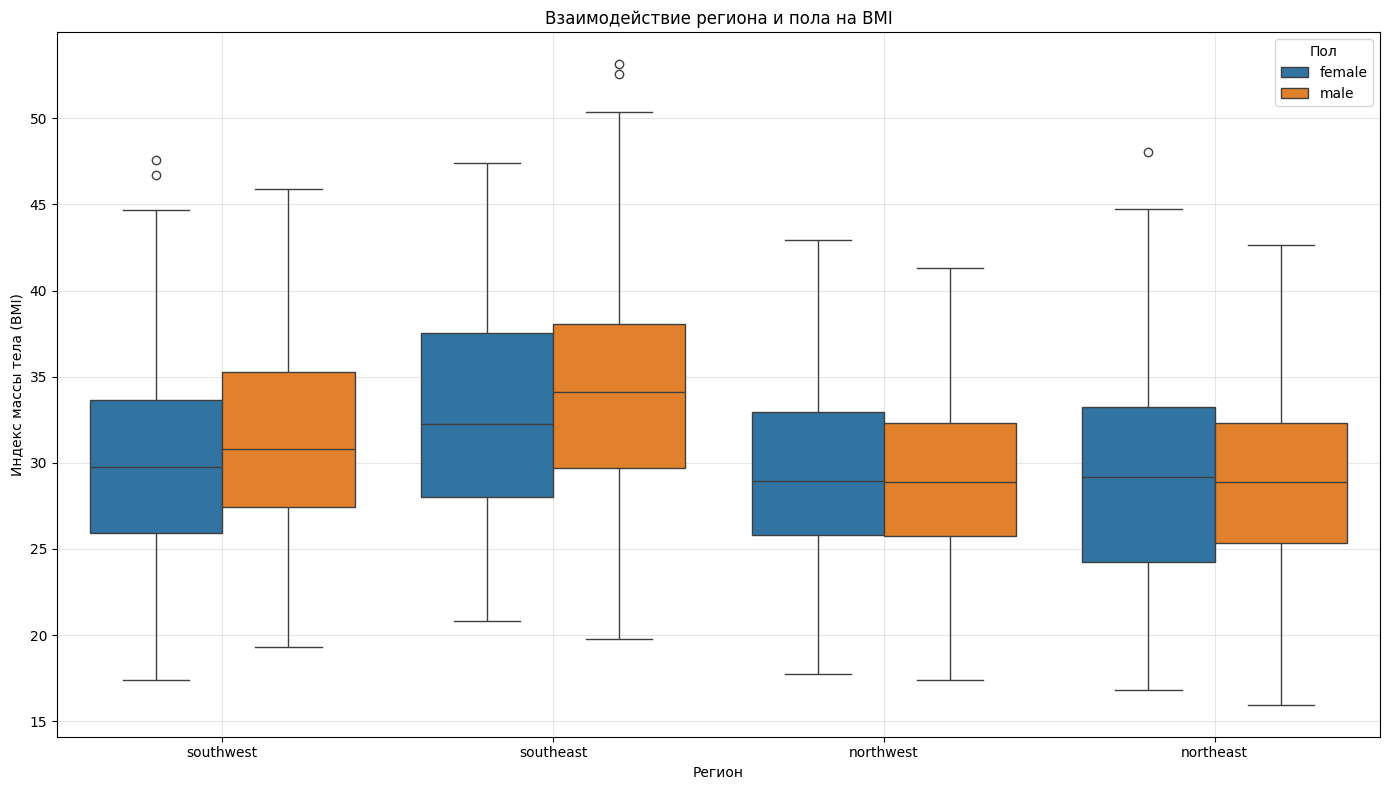

In [26]:
import seaborn as sns
data_2['region_sex'] = data_2['region'] + '_' + data_2['sex']
tukey_pair = pairwise_tukeyhsd(data_2['bmi'], data_2['region_sex'], alpha=0.05)
print(tukey_pair)

plt.figure(figsize=(14, 8))
sns.boxplot(x='region', y='bmi', hue='sex', data=data_2)
plt.title('Взаимодействие региона и пола на BMI')
plt.xlabel('Регион')
plt.ylabel('Индекс массы тела (BMI)')
plt.legend(title='Пол')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()